# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for dimensionality reduction and anomaly detection.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)
### Task 1.1. (1 point)
Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).
1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf
2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

#### Your solution:

Minimization functions:

1. Scholkoph - v-SVC:

$
\\
\underset{w \in \mathcal{F}, {\xi} \in \mathbb{R}^l, {\rho} \in \mathbb{R}}{\min} \cfrac{1}{2} \| w \|^2 + \cfrac{1}{{\nu} l} \sum\limits_i {\xi}_i - \rho
\\
\textbf{subject to }\ (w \cdot \mathbf{\Phi(x_i)}) \geq {\rho} - {\xi}_i,\quad {\xi}_i \geq 0
$

We consider training data 
$
{x_1, \ldots x_l} \in \mathcal{X}
$, where number of observations is
$
l \in \mathbb{N}
$ and 
$
\mathcal{X}
$ 
is some set, 
$
\Phi : \mathcal{X} \to \mathcal{F}
$
is feature map - map into a dot product space 
$
\mathcal{F}
$
$,
\nu \in (0, 1)
$ - parameter, indicating the fracture of the data that should be separated.
2. Tax - SVDD:

Error function to minimize: 

$
F(R, \mathbf{a}) = R^2 + C\sum\limits_i{\xi}_i
\\
\textbf{constraints : }\ \|x_i - \mathbf{a}\| \leq R^2 + {\xi}_i, \forall i \quad {\xi}_i \geq 0
$

Again we have training set $x_i$, $R > 0$ - radius of hypersphere, $\mathbf{a}$ - center of hypersphere. $C$ - parameter that controls trade-off between errors and volume of hypersphere.


Comparison of this functions explained in second paper in part 2.1:

In first paper we minimize the structural error of hyperplane (measured by $\| \mathbf{w} \|$), that separates the dataset from the origin with maximal margin - not a closed boundary around the data and gives comparable solutions when the data is preprocessed to have unit norm. In second paper we consider model that will give a closed boundary around given data - hypersphere. If in second paper we will transform all data to unit norm (again, because of different "geometrical" problem s' statements we cannot compare "raw" data), normalize vectors given above and obtain optimization problem similar to problem in first paper (so that we could compare):

$
\\
\underset{{\xi} \in \mathbb{R}^N, {\rho} \in \mathbb{R}}{\max} -\cfrac{1}{{\nu} N} \sum\limits_i {\xi}_i + \rho - 2
\\
\textbf{subject to }\ (\mathbf{w} \cdot \mathbf{\vec{x}_i}) \geq {\rho} - {\xi}_i,\quad {\xi}_i \geq 0,\quad \| \mathbf{w} \| = 2
$

The difference of now comparable optimization problems is in the constraint on the norm of $\mathbf{w}$ and presence of factor 2 (it kind of biasing/offsetting factor) in or fucntion.

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [361]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('data/creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [362]:
# impurity estimation on test data
contamination = np.sum(test_y) / len(test_y)
#print(contamination)

In [366]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM

seed = 42

for i in [0.1, 1, 10]:
    
    detection_LOF = LocalOutlierFactor(contamination = i * contamination, n_jobs = -1, novelty = True)
    detection_forest = IsolationForest(contamination = i * contamination, random_state = seed, behaviour = 'new')
    detection_elliptic = EllipticEnvelope(contamination = i * contamination, random_state = seed, support_fraction = 1)
    detection_1class = OneClassSVM(kernel = 'rbf') # does not contain contamination

    #detector_list = [detection_LOF, detection_forest, detection_elliptic, detection_1class]
    detector_list = [detection_LOF, detection_forest, detection_elliptic]
    #title_list = ['LocalOutlier factor', 'Isolation forest', 'Elliptic envelope', '1 Class SVM']
    title_list = ['LocalOutlier factor', 'Isolation forest', 'Elliptic envelope']
    
    for j, detector in enumerate(detector_list):
        
        detector.fit(train_X)
        labels_isolation = detector.predict(test_X)
        #labels_isolation = detector.fit_predict(test_X)
        
        labels_isolation[labels_isolation > 0] = 0 
        labels_isolation[labels_isolation < 0] = 1
        
        
        print('We are using', title_list[j])
         
        print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))
        
    print()

We are using LocalOutlier factor
Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
We are using Isolation forest
Contamination:  0.002   ROC/AUC:  0.531 Precision:  0.984
We are using Elliptic envelope
Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.983

We are using LocalOutlier factor
Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.963
We are using Isolation forest
Contamination:  0.017   ROC/AUC:  0.773 Precision:  0.987
We are using Elliptic envelope
Contamination:  0.017   ROC/AUC:  0.742 Precision:  0.985

We are using LocalOutlier factor
Contamination:  0.169   ROC/AUC:  0.506 Precision:  0.817
We are using Isolation forest
Contamination:  0.169   ROC/AUC:  0.871 Precision:  0.845
We are using Elliptic envelope
Contamination:  0.169   ROC/AUC:  0.862 Precision:  0.848



Results tell that in first case Isolation forest performs slightly better in terms of ROC AUC score and all algorithms performed very close in terms of presision.
In second case Isolation forest scored better again in terms of both metrics.
For the last case Isolation forest scored better in terms of ROC AUC, but slightly worse than Elliptic envelope in terms of precision.
Also I shouls point that despite Isolation forest overall get higher scores, Elliptic envelope was rather close in both ROC AUC and precision scores, so let there will be 2 winners.

### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [395]:
# your favorite classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.model_selection import StratifiedKFold

seed = 42

#favorite_classifier = RandomForestClassifier(random_state = seed, n_jobs = -1)
#favorite_classifier = DecisionTreeClassifier(random_state = seed)
favorite_classifier = AdaBoostClassifier(random_state = seed)
#favorite_classifier = KNeighborsClassifier()
#favorite_classifier = SVC(random_state = seed)


skf = StratifiedKFold(n_splits=10, random_state = seed)
skf.get_n_splits(test_X, test_y)

roc_auc_score_ = [] # The name of list coincided with score function, not good...
pr_score = []

clf = favorite_classifier

for train_index, test_index in skf.split(test_X, test_y):

    # as in previous HW
    X_train = test_X.iloc[train_index] 
    X_test = test_X.iloc[test_index]
    y_train = test_y.iloc[train_index]
    y_test = test_y.iloc[test_index]
    
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    
    roc_auc_score_.append(roc_auc_score(y_test, prediction))
    pr_score.append(precision_score(y_test, prediction, average = 'micro'))
        
    
print('ROC/AUC mean: ', np.mean(roc_auc_score_), 'std: ', np.std(roc_auc_score_))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.8994724487274525 std:  0.10954634771061356
Precision mean:  0.9955076876930624 std:  0.004098231139921194


In [399]:
# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_score_ = []
pr_score = []

ifc = IsolationForest(random_state = 42, behaviour = 'new')
clf = favorite_classifier

for train_index, test_index in skf.split(test_X, test_y):

    X_train = test_X.iloc[train_index] 
    X_test = test_X.iloc[test_index]
    y_train = test_y.iloc[train_index]
    y_test = test_y.iloc[test_index]
    
    ifc.fit(X_train)
    clf.fit(X_train, y_train)
    
    prediction_clf = clf.predict(X_test)
    prediction_ifc = ifc.predict(X_test)
    
    prediction_ifc[prediction_ifc > 0] = 0
    prediction_ifc[prediction_ifc < 0] = 1
    
    prediction_map = map(int, np.logical_or(prediction_clf, prediction_ifc))
    prediction = np.array(list(prediction_map), dtype=int)
    
    roc_auc_score_.append(roc_auc_score(y_test, prediction))
    pr_score.append(precision_score(y_test, prediction, average = 'micro'))
   
    
print('ROC/AUC mean: ', np.mean(roc_auc_score_), 'std: ', np.std(roc_auc_score_))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWa

ROC/AUC mean:  0.9058642204101804 std:  0.09156768045321531
Precision mean:  0.9114720134165903 std:  0.023769478033814018


With introduced logical function 'or' we managed to increase ROC AUC perfomnce (precision is decreased, but still relatively good), I also assume that with more wise and complex ensembling we can get better results (as it mentioned in task, even increase perfomance in terms of both metrics).

## Task 2. Practice with Different Clustering Algorithms. (4 points)
### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)
Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

True number of clusters is 15


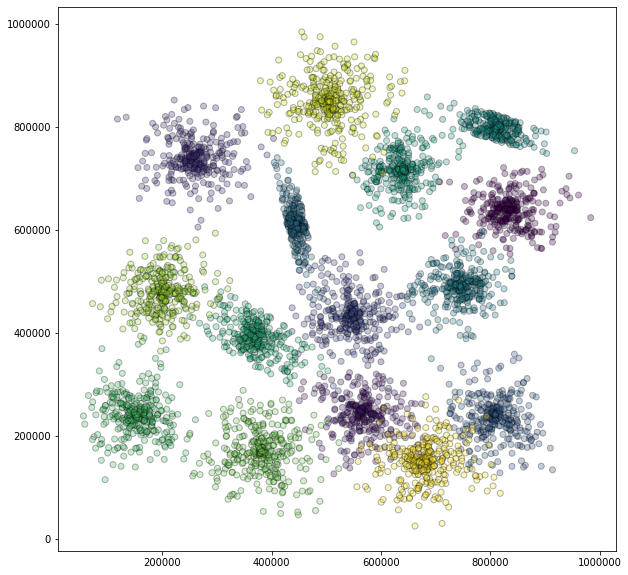

In [214]:
import matplotlib.gridspec as gridspec

points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [204]:
### BEGIN Solution
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

seed = 42
n = 15

parameter_Kmeans = {#"n_init" : [i+1 for i in range(20)],
                    "algorithm" : ['auto', 'full', 'elkan'],
                    "max_iter" : [100, 200, 300, 400]}
parameter_GM = {"covariance_type" : ['full', 'tied', 'diag', 'spherical']}
parameter_AP = {"damping" : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]} # this algorithm does nor contain number of clusters as imput p-r
parameter_AC = {"linkage" : ['complete', 'average', 'single'], 
                "affinity" : ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']}
parameter_Birch = {'threshold':[5, 10, 15], 
                   'branching_factor':[2, 3, 4, 5]}

best_Kmeans = {}
best_GM = {}
best_Birch = {}
best_AC = {}

silhouette_score_list_Kmeans = []
mutual_info_score_list_Kmeans = []

silhouette_score_list_GM = []
mutual_info_score_list_GM = []

silhouette_score_list_Birch = []
mutual_info_score_list_Birch = []

silhouette_score_list_AC = []
mutual_info_score_list_AC = []

In [205]:
def print_score(Alg, silh, mut, params):
    print(Alg)
    print('silhouette_score: ', silh)
    print('mutual_info_score: ', mut)
    print(params)
    print()
    print()

In [206]:
# Kmeans

silhouette_score_list_alg = []
mutual_info_score_list_alg = []

#silhouette_score_list_n = []
#mutual_info_score_list_n = []

#for n_ in parameter_Kmeans["n_init"]:
for alg in parameter_Kmeans["algorithm"]:
    
    silhouette_score_list_iter = []
    mutual_info_score_list_iter = []
    
    for m_iter in parameter_Kmeans["max_iter"]:

        cl = KMeans(algorithm = alg, max_iter = m_iter, n_clusters = int(n), random_state = seed)
        prediction = cl.fit_predict(points)
            
        silhouette_score_list_iter.append(silhouette_score(points, prediction, random_state = seed))
        mutual_info_score_list_iter.append(mutual_info_score(labels, prediction))
            
    silhouette_score_list_alg.append(silhouette_score_list_iter)
    mutual_info_score_list_alg.append(mutual_info_score_list_iter)
        
mutual_info_score_list_alg = np.array(mutual_info_score_list_alg)        
silhouette_score_list_alg = np.array(silhouette_score_list_alg)         
        
i, j = np.where(mutual_info_score_list_alg == np.min(mutual_info_score_list_alg))
#print(i, j)
i, j =np.where(silhouette_score_list_alg == np.min(silhouette_score_list_alg))
#print(i, j)
#print()
# we can see that max_iter parameter does not help us much and also we clearly have a winner among algorithms
best_Kmeans['algorithm'] = parameter_Kmeans["algorithm"][int(i[int(j[0])])]

#print('Best result for Kmeans:',  best_Kmeans)

silhouette_score_list_Kmeans = silhouette_score_list_alg[i, j][0]
mutual_info_score_list_Kmeans = mutual_info_score_list_alg[i, j][0]

In [207]:
# GaussianMixture

silhouette_score_list = []
mutual_info_score_list = []

silhouette_score_list_GM = []
mutual_info_score_list_GM = []

for c_type in parameter_GM["covariance_type"]:

    cl = GaussianMixture(covariance_type = c_type, n_components = int(n), random_state = seed)
    prediction = cl.fit_predict(points)
        
    silhouette_score_list.append(silhouette_score(points, prediction, random_state = seed))
    mutual_info_score_list.append(mutual_info_score(labels, prediction))
    
silhouette_score_list = np.array(silhouette_score_list)
mutual_info_score_list = np.array(mutual_info_score_list) 

i = np.where(mutual_info_score_list == np.min(mutual_info_score_list))
#print(i)
i =np.where(silhouette_score_list == np.min(silhouette_score_list))
#print(i)
#print()
best_GM['covariance_type'] = parameter_GM["covariance_type"][int(i[int(j[0])])]

#print('Best result for GaussianMixture:',  best_GM)

silhouette_score_list_GM = silhouette_score_list[i][0]
mutual_info_score_list_GM = mutual_info_score_list[i][0]

In [208]:
# Birch
silhouette_score_list_alg = []
mutual_info_score_list_alg = []

silhouette_score_list_Birch = []
mutual_info_score_list_Birch = []

for alg in parameter_Birch["threshold"]:
    
    silhouette_score_list_iter = []
    mutual_info_score_list_iter = []
    
    for m_iter in parameter_Birch["branching_factor"]:
         
        cl = Birch(threshold = alg, branching_factor = m_iter, n_clusters = int(n))
        prediction = cl.fit_predict(points)
            
        silhouette_score_list_iter.append(silhouette_score(points, prediction, random_state = seed))
        mutual_info_score_list_iter.append(mutual_info_score(labels, prediction))
            
    silhouette_score_list_alg.append(silhouette_score_list_iter)
    mutual_info_score_list_alg.append(mutual_info_score_list_iter)
        
mutual_info_score_list_alg = np.array(mutual_info_score_list_alg)        
silhouette_score_list_alg = np.array(silhouette_score_list_alg)         
        
i, j = np.where(mutual_info_score_list_alg == np.min(mutual_info_score_list_alg))
#print(i, j)
i, j =np.where(silhouette_score_list_alg == np.min(silhouette_score_list_alg))
#print(i, j)
#print()

best_Birch['threshold'] = parameter_Birch["threshold"][int(i[int(j[0])])]
best_Birch['branching_factor'] = parameter_Birch["branching_factor"][int(i[int(j[0])])]

#print('Best result for Birch:',  best_Birch)

silhouette_score_list_Birch = silhouette_score_list_alg[i, j][0]
mutual_info_score_list_Birch = mutual_info_score_list_alg[i, j][0]

In [210]:
# AgglomerativeClustering

silhouette_score_list_alg = []
mutual_info_score_list_alg = []

for alg in parameter_AC["linkage"]:
    
    silhouette_score_list_iter = []
    mutual_info_score_list_iter = []
    
    for m_iter in parameter_AC["affinity"]:
         
        cl = AgglomerativeClustering(linkage = alg, affinity = m_iter, n_clusters = int(n))
        prediction = cl.fit_predict(points)
            
        silhouette_score_list_iter.append(silhouette_score(points, prediction, random_state = seed))
        mutual_info_score_list_iter.append(mutual_info_score(labels, prediction))
            
    silhouette_score_list_alg.append(silhouette_score_list_iter)
    mutual_info_score_list_alg.append(mutual_info_score_list_iter)
        
mutual_info_score_list_alg = np.array(mutual_info_score_list_alg)        
silhouette_score_list_alg = np.array(silhouette_score_list_alg)         

i, j = np.where(mutual_info_score_list_alg == np.min(mutual_info_score_list_alg))
#print(i, j)
i, j =np.where(silhouette_score_list_alg == np.min(silhouette_score_list_alg))
#print(i, j)
#print()
# we can see that max_iter parameter does not help us much and also we clearly have a winner among algorithms
best_AC['linkage'] = parameter_AC["linkage"][int(i[int(j[0])])]
best_AC['affinity'] = parameter_AC["affinity"][int(i[int(j[0])])]

#print('Best result for AgglomerativeClustering:',  best_AC)

silhouette_score_list_AC = silhouette_score_list_alg[i, j][0]
mutual_info_score_list_AC = mutual_info_score_list_alg[i, j][0]

[0] [0]
[0] [0]

Best result for AgglomerativeClustering: {'linkage': 'average', 'affinity': 'euclidean'}


In [213]:
print('silhouette_score for true labels: ', silhouette_score(points, labels))
print()
print_score('Kmeans', silhouette_score_list_Kmeans, mutual_info_score_list_Kmeans, best_Kmeans)
print_score('GaussianMixture', silhouette_score_list_GM, mutual_info_score_list_GM, best_GM)
print_score('Birch', silhouette_score_list_Birch, mutual_info_score_list_Birch, best_Birch)
print_score('AgglomerativeClustering', silhouette_score_list_AC, mutual_info_score_list_AC, best_AC)
### END Solution

silhouette_score for true labels:  0.6088944608894215

Kmeans
silhouette_score:  0.626169141840935
mutual_info_score:  2.559577292157661
{'algorithm': 'full'}


GaussianMixture
silhouette_score:  0.6127213186400577
mutual_info_score:  2.528531812128561
{'covariance_type': 'spherical'}


Birch
silhouette_score:  0.6075939207380119
mutual_info_score:  2.5077832875665407
{'threshold': 5, 'branching_factor': 2}


AgglomerativeClustering
silhouette_score:  0.6091772373449134
mutual_info_score:  2.519454846864759
{'linkage': 'average', 'affinity': 'euclidean'}




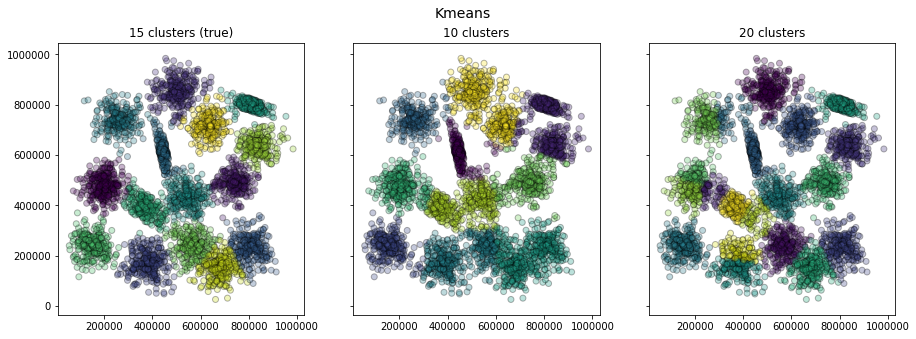

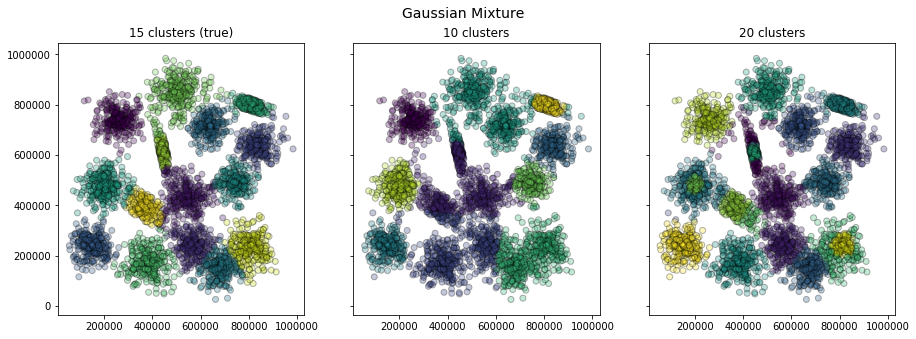

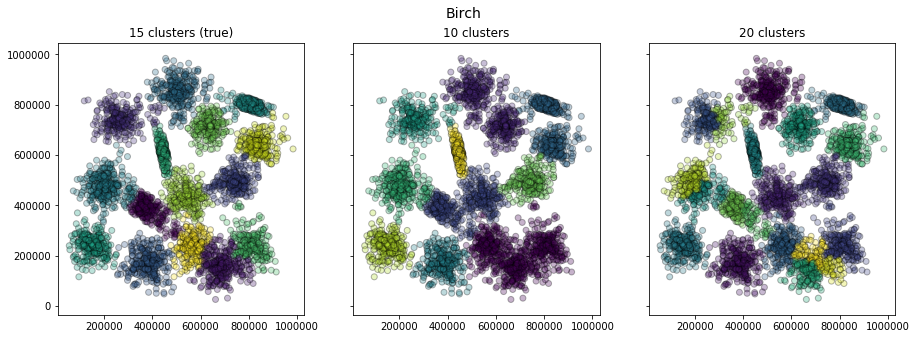

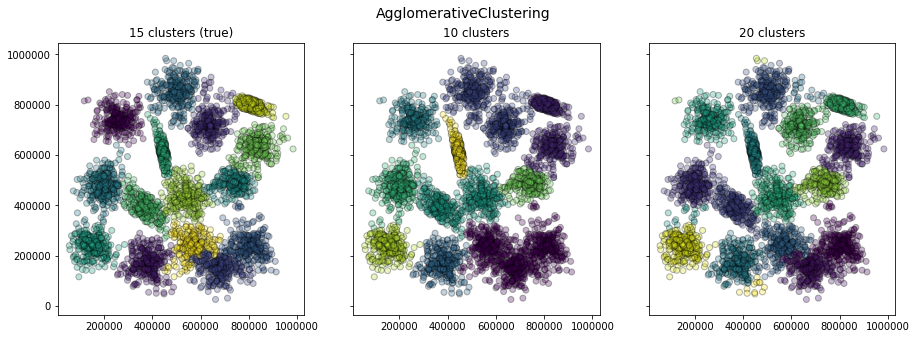

In [246]:
# Apply the algorithm with the true number of clusters and at least two other
# settings for the number of clusters: a smaller and a larger number than the true one;

### BEGIN Solution
'''
def plot_clustering():
    plt.subplots(1, 3, figsize=(12,4))

'''        
N_clusters = [15, 10, 20]

# Kmeans
fig, axes = plt.subplots(1, 3, sharey = True, figsize=(15,5))
fig.suptitle('Kmeans', fontsize = 14)
k = 0
title = ''

for n in N_clusters:
    
    cluster = KMeans(n_clusters = n, random_state = seed, algorithm = best_Kmeans['algorithm'])
    prediction = cluster.fit_predict(points)
    
    if k == 0 : title = str(n) + ' clusters (true)'
    else: title = str(n) + ' clusters'
            
    axes[k].scatter(points[:,0], points[:,1], c=prediction, alpha=0.3, edgecolor='k')    
    axes[k].set_title(title, fontsize = 12)
    k += 1
    
# Gaussian Mixture    
fig, axes = plt.subplots(1, 3, sharey = True, figsize=(15,5))
fig.suptitle('Gaussian Mixture', fontsize = 14)
k = 0
title = ''

for n in N_clusters:
    
    cluster = GaussianMixture(n_components = n, random_state = seed, covariance_type = best_GM['covariance_type'])
    prediction = cluster.fit_predict(points)
    
    if k == 0 : title = str(n) + ' clusters (true)'
    else: title = str(n) + ' clusters'
            
    axes[k].scatter(points[:,0], points[:,1], c=prediction, alpha=0.3, edgecolor='k')    
    axes[k].set_title(title, fontsize = 12)
    k += 1

# Birch
fig, axes = plt.subplots(1, 3, sharey = True, figsize=(15,5))
fig.suptitle('Birch', fontsize = 14)
k = 0
title = ''

for n in N_clusters:
    
    cluster = Birch(n_clusters = n, threshold = best_Birch['threshold'], branching_factor = best_Birch['branching_factor'])
    prediction = cluster.fit_predict(points)
    
    if k == 0 : title = str(n) + ' clusters (true)'
    else: title = str(n) + ' clusters'
            
    axes[k].scatter(points[:,0], points[:,1], c=prediction, alpha=0.3, edgecolor='k')    
    axes[k].set_title(title, fontsize = 12)
    k += 1

# AgglomerativeClustering
fig, axes = plt.subplots(1, 3, sharey = True, figsize=(15,5))
fig.suptitle('AgglomerativeClustering', fontsize = 14)
k = 0
title = ''

for n in N_clusters:
    
    cluster = AgglomerativeClustering(n_clusters = n, linkage = best_AC['linkage'], affinity = best_AC['affinity'])
    prediction = cluster.fit_predict(points)
    
    if k == 0 : title = str(n) + ' clusters (true)'
    else: title = str(n) + ' clusters'
            
    axes[k].scatter(points[:,0], points[:,1], c=prediction, alpha=0.3, edgecolor='k')    
    axes[k].set_title(title, fontsize = 12)
    k += 1
### END Solution

In [248]:
# vizualize the clustering result, calculate the clustering metrics and plot them;
### BEGIN Solution

N_clusters = [i for in range(10, 21)]

silhouette_score_list_Kmeans = []
silhouette_score_list_GM = []
silhouette_score_list_Birch = []
silhouette_score_list_AC = []

mutual_info_score_list_Kmeans = []
mutual_info_score_list_GM = []
mutual_info_score_list_Birch = []
mutual_info_score_list_AC = []


# Kmeans

for n in N_clusters:
    n = int(n)
    cluster = KMeans(n_clusters = n, random_state = seed, algorithm = best_Kmeans['algorithm'])
    prediction = cluster.fit_predict(points)
    silhouette_score_list_Kmeans.append(silhouette_score(points, prediction, random_state = seed))
    mutual_info_score_list_Kmeans.append(mutual_info_score(labels, prediction))
    
# Gaussian Mixture    

    cluster = GaussianMixture(n_components = n, random_state = seed, covariance_type = best_GM['covariance_type'])
    prediction = cluster.fit_predict(points)
    silhouette_score_list_GM.append(silhouette_score(points, prediction, random_state = seed))
    mutual_info_score_list_GM.append(mutual_info_score(labels, prediction))

# Birch

    cluster = Birch(n_clusters = n, threshold = best_Birch['threshold'], branching_factor = best_Birch['branching_factor'])
    prediction = cluster.fit_predict(points)
    silhouette_score_list_Birch.append(silhouette_score(points, prediction, random_state = seed))
    mutual_info_score_list_Birch.append(mutual_info_score(labels, prediction))

# AgglomerativeClustering
    
    cluster = AgglomerativeClustering(n_clusters = n, linkage = best_AC['linkage'], affinity = best_AC['affinity'])
    prediction = cluster.fit_predict(points)
    silhouette_score_list_AC.append(silhouette_score(points, prediction, random_state = seed))
    mutual_info_score_list_AC.append(mutual_info_score(labels, prediction))
       
### END Solution

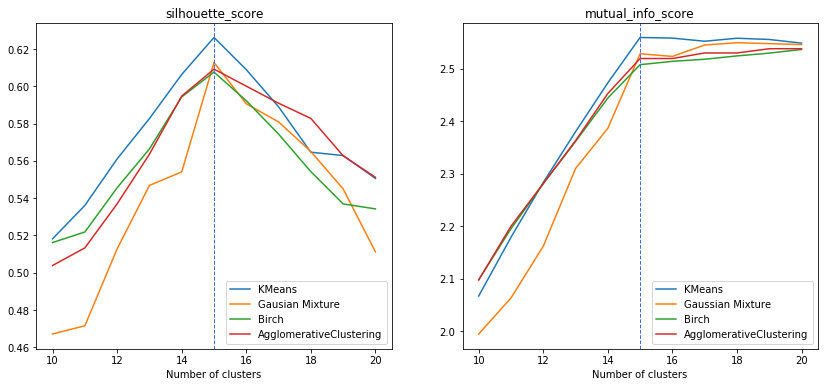

In [255]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

ax[0].set_title('silhouette_score')
ax[0].plot(N_clusters, silhouette_score_list_Kmeans, label = 'KMeans')
ax[0].plot(N_clusters, silhouette_score_list_GM, label = 'Gausian Mixture')
ax[0].plot(N_clusters, silhouette_score_list_Birch, label = 'Birch')
ax[0].plot(N_clusters, silhouette_score_list_AC, label = 'AgglomerativeClustering')
ax[0].legend(loc = 'best')
ax[0].axvline(15, lw=1, color='royalblue', linestyle='dashed')
ax[0].set_xlabel('Number of clusters')

ax[1].set_title('mutual_info_score')
ax[1].plot(N_clusters, mutual_info_score_list_Kmeans, label = 'KMeans')
ax[1].plot(N_clusters, mutual_info_score_list_GM, label = 'Gaussian Mixture')
ax[1].plot(N_clusters, mutual_info_score_list_Birch, label = 'Birch')
ax[1].plot(N_clusters, mutual_info_score_list_AC, label = 'AgglomerativeClustering')
ax[1].legend(loc = 'best')
ax[1].axvline(15, lw=1, color='royalblue', linestyle='dashed')
ax[1].set_xlabel('Number of clusters')

plt.show()

### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

In [523]:
import scipy

from tqdm import tqdm_notebook, tqdm
from sklearn.utils import resample
from scipy.stats import norm
### BEGIN Solution

cluster_ns = N_clusters
sample_number = 50
#scores = np.zeros()
mean_score_list = []
upper_bound_list = []
lower_bound_list  = []


for i, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    # >>> your solution here <<<
    scores = []
    cl = KMeans(n_clusters = n_clusters, random_state = seed)
    #boot_sample, _ = train_test_split(points, train_size = int(points.shape[0]/sample_number), test_size=None, random_state = seed)
    for _ in range(sample_number):
        #boot_sample = resample(points, replace=True, n_samples = int(points.shape[0]/5) , random_state = seed)
        boot_sample = points[np.random.randint(0, points.shape[0], size = int(points.shape[0]/5))]
        scores.append(silhouette_score(boot_sample, cl.fit_predict(boot_sample), random_state = seed))
    score_list = np.array(scores)
    mean_score_list.append(np.mean(scores))
    interval = norm.interval(0.95, loc = mean_score_list[-1], scale = np.std(score_list)/np.sqrt(sample_number))
    lower_bound_list.append(interval[0])
    upper_bound_list.append(interval[1])
    
    print('Number of clusters:', n_clusters)
    print('\tVariance:', np.std(score_list)/np.sqrt(sample_number))
    print('\tConfidence intervals:', interval, '\n')

Number of clusters: 10
	Variance: 0.0016100832674938409
	Confidence intervals: (0.5192843687880117, 0.5255957792208087) 

Number of clusters: 11
	Variance: 0.001998795944484083
	Confidence intervals: (0.537736615594559, 0.545571751721826) 

Number of clusters: 12
	Variance: 0.001719650738369192
	Confidence intervals: (0.5608392358207984, 0.5675801428471811) 

Number of clusters: 13
	Variance: 0.0013111112609681696
	Confidence intervals: (0.5840899220288719, 0.5892293837313168) 

Number of clusters: 14
	Variance: 0.0012321880768314361
	Confidence intervals: (0.6139685793111347, 0.6187986678166733) 

Number of clusters: 15
	Variance: 0.0011000148757887881
	Confidence intervals: (0.62826735080201, 0.6325793298800186) 

Number of clusters: 16
	Variance: 0.001372328475464949
	Confidence intervals: (0.6094450375574743, 0.6148244663312143) 

Number of clusters: 17
	Variance: 0.0016250521941822307
	Confidence intervals: (0.594591464359146, 0.6009615519063359) 

Number of clusters: 18
	Variance

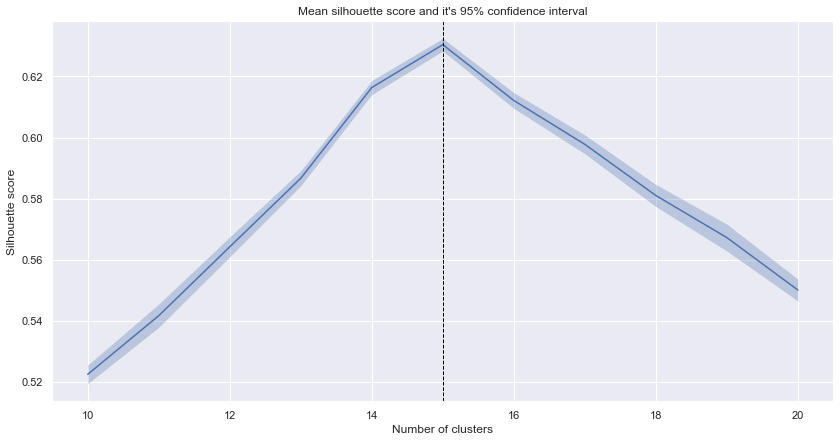

In [524]:
import seaborn as sns
sns.set()
plt.figure(figsize = (14,7))
plt.plot(cluster_ns, mean_score_list)
plt.fill_between(cluster_ns, upper_bound_list, lower_bound_list, alpha = 0.3)
plt.axvline(15, lw=1, color='black', linestyle='dashed')

plt.title("Mean silhouette score and it's 95% confidence interval")
plt.xlabel('Number of clusters')   
plt.ylabel('Silhouette score')

plt.show()

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)
### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case use can use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [400]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

In [401]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstanec betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

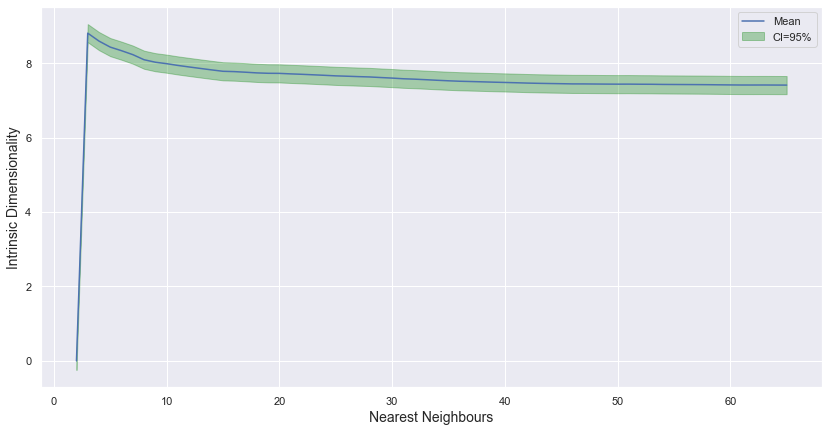

In [418]:
# Estimate the intrinsic dimentionality of the dataset. 
import warnings
warnings.simplefilter('ignore') # ругается
### BEGIN Solution
start = 2
end = 65
CI = 0.95
start_end = np.arange(start, 1 + end) ## 2..65

intrinsic_dimensionality = np.array(repeated(func = intrinsic_dim_scale_interval, X = data, nb_iter = 20, k1 = start, k2 = end, random_state = seed))
Mean = np.mean(intrinsic_dimensionality, axis=0)
left_border, right_border = norm.interval(CI, loc = Mean, scale = np.std(Mean) / np.sqrt(len(Mean)))

plt.figure(figsize = (14, 7))

plt.plot(start_end, Mean, label = 'Mean')
plt.fill_between(start_end, left_border, right_border, alpha = 0.3, color = 'green', label = 'CI=95%')
plt.xlabel('Nearest Neighbours', fontsize = 14)
plt.ylabel('Intrinsic Dimensionality', fontsize = 14)
plt.legend(loc = 'best')

plt.show()
### END Solution

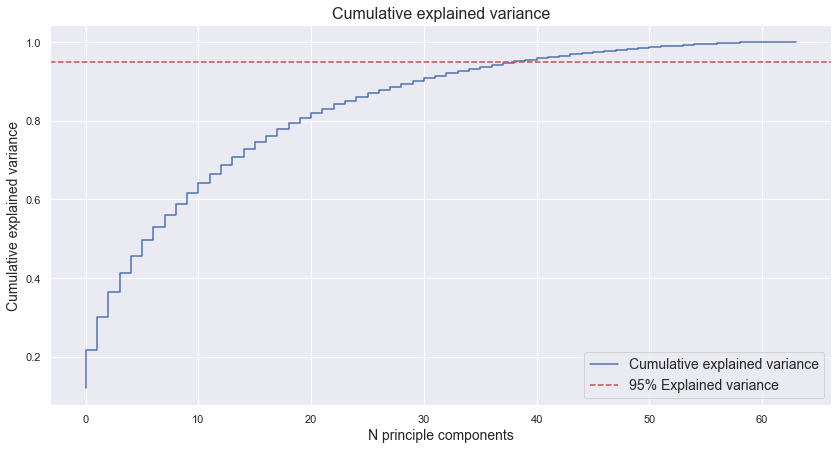

In [435]:
# Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component.
from sklearn.decomposition import PCA

### BEGIN Solution
N = 64
N_range = np.arange(N)

PCA_N = PCA(n_components = N, random_state = seed)
PCA_N.fit(data)
PCA_N.transform(data)
Variance_explained = PCA_N.explained_variance_ratio_

plt.figure(figsize=(14, 7))

plt.step(N_range, np.cumsum(Variance_explained), label='Cumulative explained variance')
plt.axhline(0.95, linestyle = '--', color = 'r' , label = '95% Explained variance')

plt.title('Cumulative explained variance', fontsize = 16)
plt.ylabel('Cumulative explained variance', fontsize = 14)
plt.xlabel('N principle components', fontsize = 14)
plt.legend(loc = 'best',  fontsize = 14)

plt.show()
### END Solution

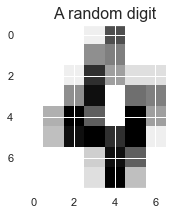

In [436]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.

plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[4], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()

y = dg.target
X = dg.images.reshape(-1, 8*8) / dg.images.max()

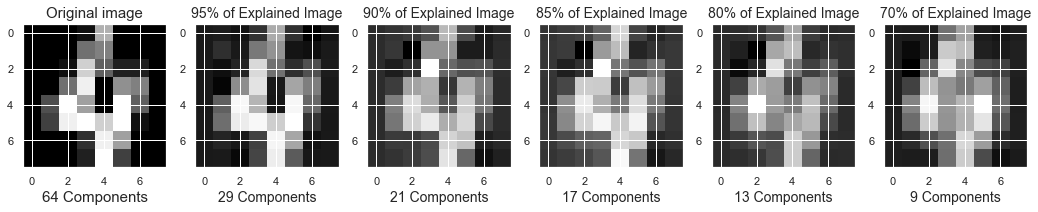

In [525]:
### BEGIN Solution
list_of_component_ratio = [1.0, 0.95, 0.9, 0.85, 0.8, 0.7]

fig, axes = plt.subplots(1, 6, figsize=(18, 3))
images = np.array(dg.images).reshape(len(dg.images), -1)

for i, ratio in enumerate(list_of_component_ratio):
    
    #print(ratio)
    if i == 0:
        axes[i].imshow(images[4].reshape(8, 8), cmap='gray')
        axes[i].set_title('Original image', fontsize=15)
        axes[i].set_xlabel('64 Components', fontsize=15)
    
    if i > 0:
        PCA_N = PCA(n_components = ratio, svd_solver = 'full', random_state = seed)
        PCA_N.fit(images)
        axes[i].imshow(PCA_N.inverse_transform(PCA_N.transform(images))[4].reshape(8, 8), cmap = 'gray')
        axes[i].set_title(str(int(ratio * 100)) + '% of Explained Image', fontsize=14)
        axes[i].set_xlabel(str(PCA_N.n_components_) + ' Components', fontsize=14)

plt.show()

### END Solution

### Task 3.2. (2 points)

Here we will visualise the decomposition in order to observe how data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Make sure the data is whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [466]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

In [467]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
### BEGIN Solution

seed = 42

digits = datasets.load_digits()
digits_data = StandardScaler().fit_transform(digits.data)
target = digits.target

pca = PCA(n_components = 3)
S_pca_ = pca.fit(digits_data)
S_pca_ = pca.transform(digits_data)

iso = Isomap(n_components = 3, n_neighbors = 3)
S_iso_ = iso.fit(digits_data)
S_iso_ = iso.transform(digits_data)

isa = FastICA(n_components = 3)
S_isa_ = isa.fit(digits_data)
S_isa_ = isa.transform(digits_data)
### END Solution

In [468]:
digits_3d = pd.DataFrame({
    'x': S_pca_[:, 0], 
    'y': S_pca_[:, 1], 
    'z': S_pca_[:, 2],
    'label': dg['target'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization PCA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

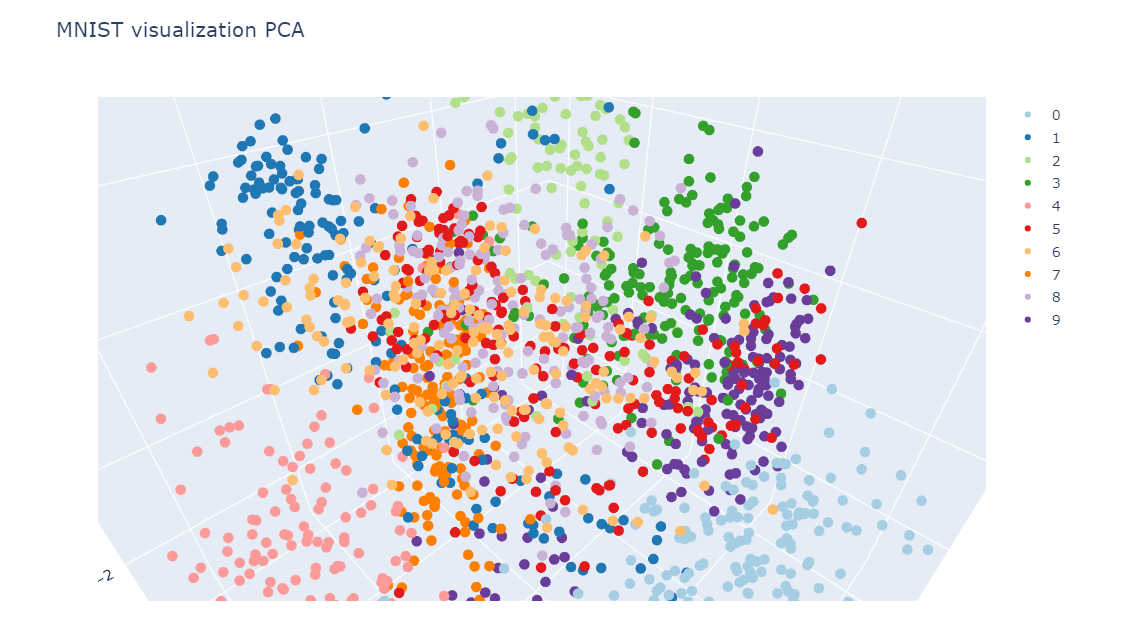

In [469]:
from IPython.display import Image
Image("pca.png")

In [479]:
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score

In [476]:
# Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
rkf_split = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = seed)

### BEGIN Solution

pca = PCA(n_components = 9)
ica = FastICA(n_components = 9)
iso = Isomap(n_components = 9, n_neighbors = 3)

man_list = [pca, ica, iso]
title_list = ['PCA', 'ICA', 'Isomap']

scores = list()
i = 0

for man in man_list:
    
    man_data = man.fit_transform(digits_data)
    score_list = []
    
    for train_index, test_index in rkf_split.split(man_data):
        
        X_train = man_data[train_index] 
        X_test = man_data[test_index]
        y_train = target[train_index]
        y_test = target[test_index]
        
        logreg.fit(X_train, y_train)
        prediction = logreg.predict(X_test)
        score_list.append(accuracy_score(prediction, y_test))
        # i += 1
        
    scores.append(score_list)

In [478]:
Mean_values = [np.mean(scores[i]) for i in range(len(scores))]
Std_values = [np.std(scores[i]) for i in range(len(scores))]

df = pd.DataFrame({'dim.reduction method': title_list, 'mean accuracy': Mean_values, 'std': Std_values})
display(df)

,dim.reduction method,mean accuracy,std
0,PCA,0.877206,0.019750
1,ICA,0.730669,0.031977
2,Isomap,0.931179,0.011262


In [485]:
_, p = ttest_ind(scores[0], scores[1]) 
print('Statistically significant improvement of PCA decomposition over ICA: p-value ', p)

Statistically significant improvement of PCA decomposition over ICA: p-value  1.3058467596928597e-14


In [487]:
_, p = ttest_ind(scores[0], scores[2]) 
print('Statistically significant improvement of Isomap decomposition over PCA: p-value ', p)

Statistically significant improvement of Isomap decomposition over PCA: p-value  1.229250317357162e-09


As we can see from the table, perfomance of Isomap is significantly better than others'. Possible reason is that Geodesic distance (Isomap) is better than Euclidean distance (not Isomap) in nonlinear manifolds, because it better approximates the close points as neighbors and far away points as distant. Good visual explanation can be found in source below (good picture).

source: https://blog.paperspace.com/dimension-reduction-with-isomap/

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [496]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist/kmnist-train-imgs.npz')
x_test = load('data/kmnist/kmnist-test-imgs.npz')
y_train = load('data/kmnist/kmnist-train-labels.npz')
y_test = load('data/kmnist/kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### BEGIN Solution
seed = 42

clf = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3)
PCA_N = PCA(n_components = 50, random_state = seed)

X_train = PCA_N.fit_transform(x_train)
clf.fit(X_train, y_train)
prediction = clf.predict(PCA_N.transform(x_test))
print('Accuracy :', accuracy_score(prediction, y_test))

Accuracy : 0.9338


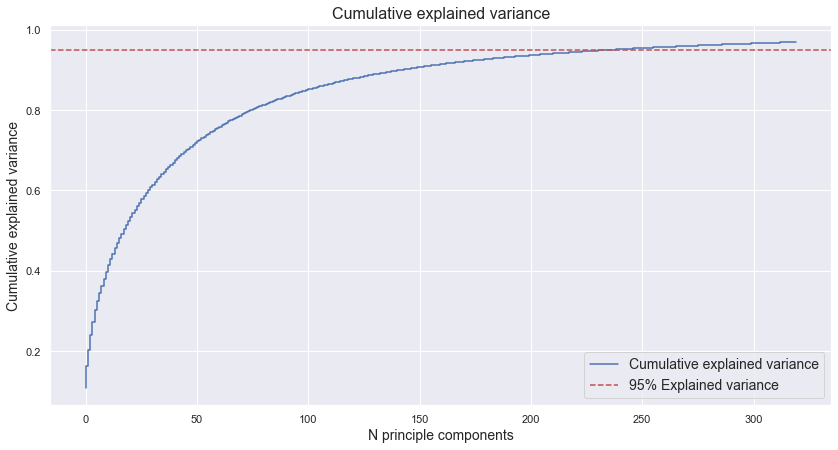

In [495]:
N = 320
N_range = np.arange(N)

PCA_N = PCA(n_components = N, random_state = seed)
PCA_N.fit(x_train)
#PCA_N.transform(data)
Variance_explained = PCA_N.explained_variance_ratio_

plt.figure(figsize=(14, 7))

plt.step(N_range, np.cumsum(Variance_explained), label='Cumulative explained variance')
plt.axhline(0.95, linestyle = '--', color = 'r' , label = '95% Explained variance')

plt.title('Cumulative explained variance', fontsize = 16)
plt.ylabel('Cumulative explained variance', fontsize = 14)
plt.xlabel('N principle components', fontsize = 14)
plt.legend(loc = 'best',  fontsize = 14)

plt.show()

In [515]:
from csv import writer

N = [10 + i *15 for i in range(21)]
score_list = []

for n in N:
    
    print(n)
    clf = KNeighborsClassifier(n_jobs = -1, n_neighbors = 3)
    PCA_N = PCA(n_components = int(n), random_state = seed)
    #PCA_N.fit(x_train)
    #PCA_N.transform(x_train)
    X_train = PCA_N.fit_transform(x_train)
    clf.fit(X_train, y_train)
    
    prediction = clf.predict(PCA_N.transform(x_test))
    score_list.append(accuracy_score(prediction, y_test))
    print(score_list[-1])    

f = open('X_train_3_3.csv', 'w')
with f:
    w = writer(f)
    for row in X_train:
        w.writerow(row[:3])
### END Solution

10
0.7756
25
0.9149
40
0.9324
55
0.9337
70
0.9345
85
0.9341
100
0.9334
115
0.9334
130
0.9318
145
0.9299
160
0.9296
175
0.9281
190
0.9273
205
0.9268
220
0.9249
235
0.9242
250
0.9233
265
0.9223
280
0.922
295
0.9209
310
0.9204


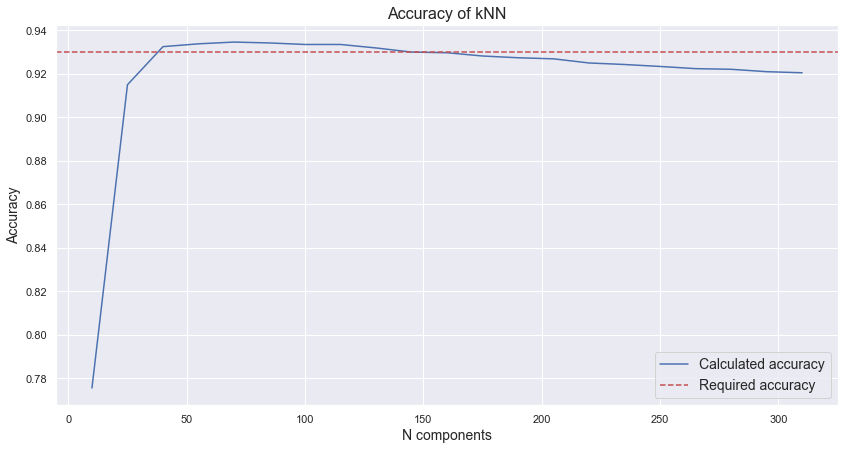

In [516]:
plt.figure(figsize=(14, 7))

plt.plot(N, score_list, label='Calculated accuracy')
plt.axhline(0.93, linestyle = '--', color = 'r' , label = 'Required accuracy')

plt.title('Accuracy of kNN', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('N components', fontsize = 14)
plt.legend(loc = 'best', fontsize = 14)

plt.show()

#### Voilla! you are done, have a good day ;)